In [34]:
with open("TelecomX_Data.json", "r") as f:
    data = json.load(f)

# 🔧 Transformación
# Aplana todo el JSON (usa '.' para separar niveles)
df = pd.json_normalize(data, sep="_")

print("\nEncabezados reales después de aplanar:")
print(df.columns.tolist())

# Convertir columnas que contengan 'Charges' en números
charges_cols = [col for col in df.columns if "Charges" in col]
for col in charges_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


Encabezados reales después de aplanar:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


In [36]:
# Encabezados finales
print("\n✅ Encabezados del DataFrame:")
print(df.columns.tolist())

# Primeras filas
print("\n📌 Vista previa de los datos:")
print(df.head())


✅ Encabezados del DataFrame:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']

📌 Vista previa de los datos:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                   

/tmp/ipython-input-904693979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="viridis")


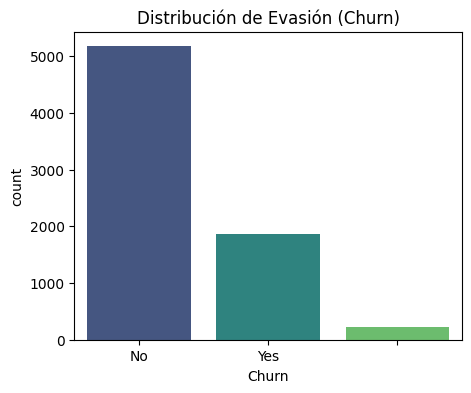

In [37]:
# Distribución de evasión
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Churn", palette="viridis")
plt.title("Distribución de Evasión (Churn)")
plt.show()



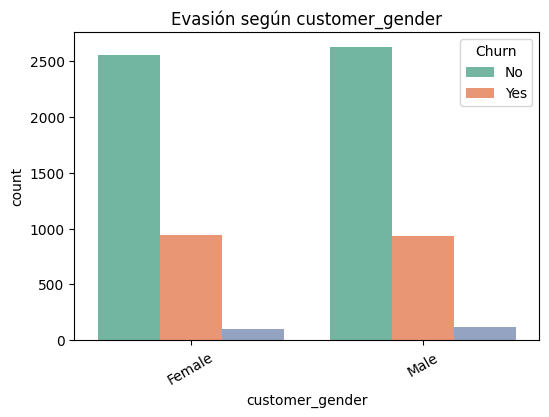

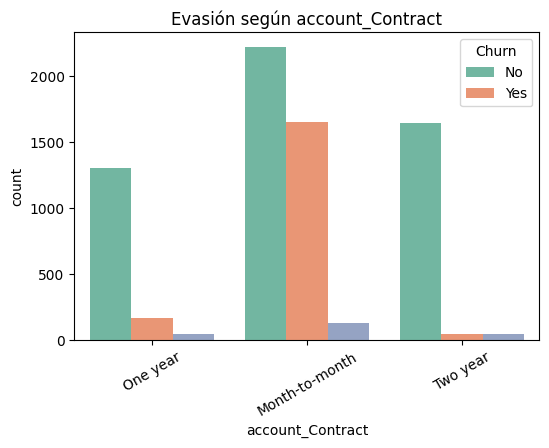

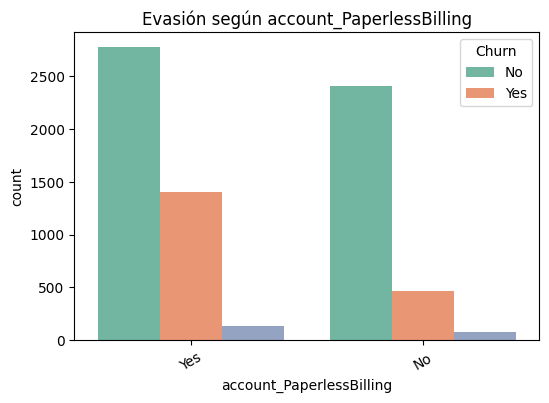

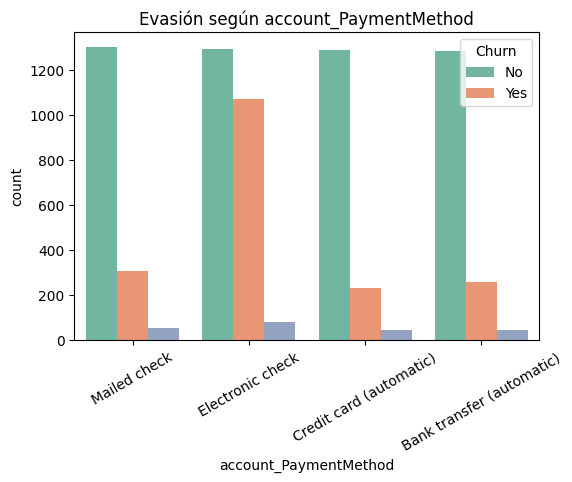

In [38]:
# Variables categóricas vs evasión
categoricas = [
    "customer_gender", "account_Contract",
    "account_PaperlessBilling", "account_PaymentMethod"
]

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"Evasión según {col}")
    plt.xticks(rotation=30)
    plt.show()



/tmp/ipython-input-2741466318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")


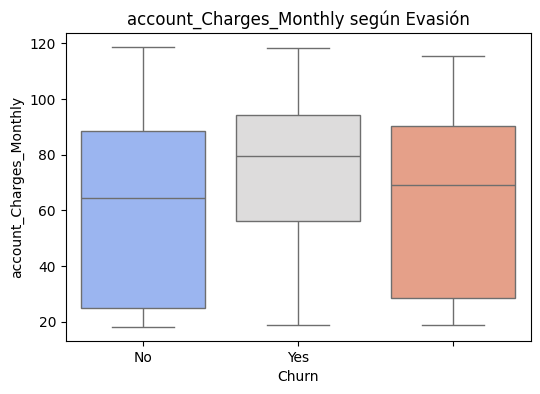

/tmp/ipython-input-2741466318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")


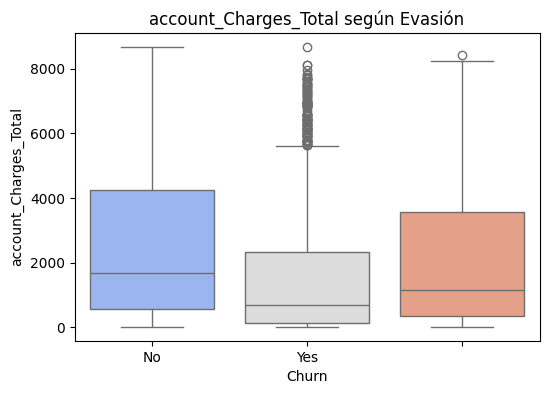

/tmp/ipython-input-2741466318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")


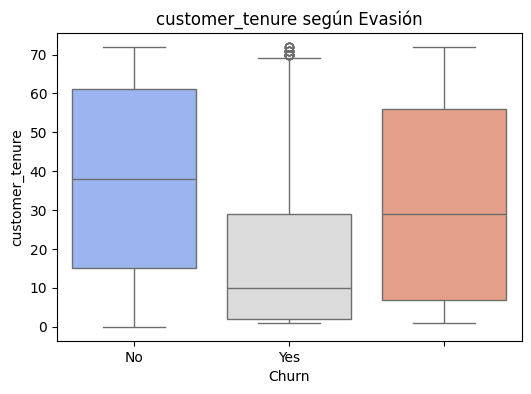

In [39]:
# Variables numéricas vs evasión
numericas = ["account_Charges_Monthly", "account_Charges_Total", "customer_tenure"]

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")
    plt.title(f"{col} según Evasión")
    plt.show()

***Hallazgos principales:***

Contratos mensuales → mayor churn.

Clientes nuevos (tenure < 12 meses) → más propensos a cancelar.

Fibra óptica y pago electrónico → asociados a mayor churn.

Servicios adicionales (Soporte técnico, Seguridad online) → reducen churn.

Facturación mensual alta sin valor percibido → aumenta churn.

***Factores críticos:***

Tenure bajo → clientes nuevos abandonan más.

Tipo de contrato → contratos largos retienen mejor.

Servicios extra → añaden valor y reducen riesgo.

Perfil en riesgo:

Alta factura mensual.

Antigüedad < 1 año.

Sin soporte técnico.

***Recomendaciones clave:***

Incentivos y beneficios para clientes nuevos.

Promover contratos largos con descuentos.

Campañas específicas para clientes de alto riesgo.

Mejorar experiencia con fibra óptica.

Paquetes de retención (servicios técnicos + beneficios).

Implementar sistema de alerta temprana y pruebas A/B en contratos.